In [95]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [96]:
don = pd.read_csv("data1.csv")

In [97]:
print(don)

    Experience Years  Salary
0                1.1   39343
1                1.2   42774
2                1.3   46205
3                1.5   37731
4                2.0   43525
5                2.2   39891
6                2.5   48266
7                2.9   56642
8                3.0   60150
9                3.2   54445
10               3.2   64445
11               3.5   60000
12               3.7   57189
13               3.8   60200
14               3.9   63218
15               4.0   55794
16               4.0   56957
17               4.1   57081
18               4.3   59095
19               4.5   61111
20               4.7   64500
21               4.9   67938
22               5.1   66029
23               5.3   83088
24               5.5   82200
25               5.9   81363
26               6.0   93940
27               6.2   91000
28               6.5   90000
29               6.8   91738
30               7.1   98273
31               7.9  101302
32               8.2  113812
33            

In [98]:
expy=don.drop("Salary",axis=1)
expy

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0
5,2.2
6,2.5
7,2.9
8,3.0
9,3.2


In [99]:
Sal=don.drop("Experience Years",axis=1)
Sal

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525
5,39891
6,48266
7,56642
8,60150
9,54445


In [100]:
don.isna().sum()

Experience Years    0
Salary              0
dtype: int64

In [101]:
don.describe

<bound method NDFrame.describe of     Experience Years  Salary
0                1.1   39343
1                1.2   42774
2                1.3   46205
3                1.5   37731
4                2.0   43525
5                2.2   39891
6                2.5   48266
7                2.9   56642
8                3.0   60150
9                3.2   54445
10               3.2   64445
11               3.5   60000
12               3.7   57189
13               3.8   60200
14               3.9   63218
15               4.0   55794
16               4.0   56957
17               4.1   57081
18               4.3   59095
19               4.5   61111
20               4.7   64500
21               4.9   67938
22               5.1   66029
23               5.3   83088
24               5.5   82200
25               5.9   81363
26               6.0   93940
27               6.2   91000
28               6.5   90000
29               6.8   91738
30               7.1   98273
31               7.9  101302
32       

In [102]:
#ici nous allons creer des variables pour fractioner les donnees de test et d'entrainement
expy_t,expy_ent,Sal_t,Sal_ent=train_test_split(expy,Sal,train_size=0.2)
#il faut PLACER LES VARIBLE DE TEST AVANT CELLE D'ENTRAINEMENT

In [103]:
expy_t

,Experience Years
16,4.0
28,6.5
1,1.2
5,2.2
34,8.7
24,5.5
26,6.0
4,2.0


In [104]:
Sal_t

,Salary
16,56957
28,90000
1,42774
5,39891
34,109431
24,82200
26,93940
4,43525


In [105]:
Sal_ent

,Salary
6,48266
13,60200
18,59095
10,64445
11,60000
31,101302
23,83088
27,91000
3,37731
7,56642


In [106]:
#affectation de l'algorithm de regression lineaire a une  variable
lin_reg=LinearRegression()

In [107]:
#entrainement du model
lin_reg.fit(expy_ent,Sal_ent)

LinearRegression()

In [108]:
 #ici nous testons le model entrainer avec les 20%
 # il predira le salaire en fonction des annees d'experience
prediction = lin_reg.predict(expy_t)
prediction

array([[ 63614.95574137],
       [ 87147.59956733],
       [ 37258.39465631],
       [ 46671.45218669],
       [107856.32613417],
       [ 77734.54203695],
       [ 82441.07080214],
       [ 44788.84068061]])

In [109]:
Sal_t

,Salary
16,56957
28,90000
1,42774
5,39891
34,109431
24,82200
26,93940
4,43525


In [110]:
#ici nous avons le pourcentage de reussite de notre Algorithm 
r2_score(prediction,Sal_t)

0.9323575236087746

In [111]:
#la moyenne des erreurs
mean_absolute_error(prediction,Sal_t)

5076.164426473531

<Axes: xlabel='Experience Years', ylabel='Salary'>

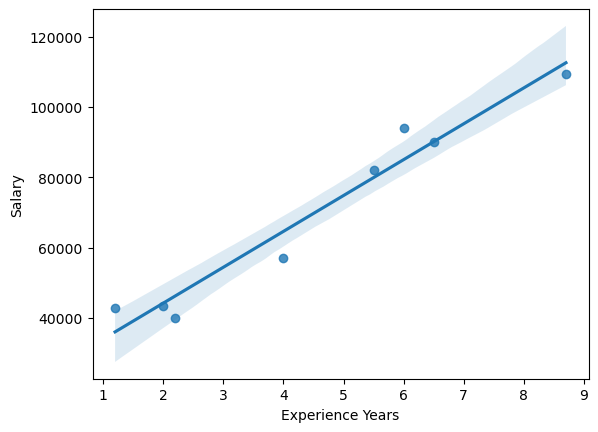

In [112]:
# la courbe de regression
sns.regplot(x=expy_t,y=Sal_t)